In [2]:
import logging
from typing import List, Optional, Union
import pandas as pd
import mplfinance as mpf
import matplotlib.patches as patches
from datetime import datetime
import matplotlib.pyplot as plt
import uuid

# Configure logging (only to file, no console)
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler("candlestick_plot.log", mode="w")  # overwrite each run
    ]
)
logger = logging.getLogger(__name__)

In [3]:
def get_default_config():
    """Return default configuration for plot settings."""
    return {
        'figsize': (20, 8),
        'style': 'charles',
        'title': 'Candlestick Chart with Trade Rectangles',
        'main_rect': {'fill_color': 'orange', 'edge_color': 'black', 'alpha': 0.1, 'linewidth': 1.5},
        'sl_rect': {'fill_color': 'red', 'edge_color': 'black', 'alpha': 0.1, 'linewidth': 1.5},
        'tp_rect': {'fill_color': 'green', 'edge_color': 'black', 'alpha': 0.1, 'linewidth': 1.5},
        'golden_outline': {'edge_color': 'gold', 'linewidth': 4}
    }

In [4]:
def get_default_config():
    """Return default configuration for plot settings."""
    return {
        'figsize': (20, 8),
        'style': 'charles',
        'title': 'Candlestick Chart with Trade Rectangles',
        'main_rect': {'fill_color': 'orange', 'edge_color': 'black', 'alpha': 0.1, 'linewidth': 1.5},
        'sl_rect': {'fill_color': 'red', 'edge_color': 'black', 'alpha': 0.1, 'linewidth': 1.5},
        'tp_rect': {'fill_color': 'green', 'edge_color': 'black', 'alpha': 0.1, 'linewidth': 1.5},
        'golden_outline': {'edge_color': 'gold', 'linewidth': 4}
    }

In [34]:
def add_rectangle(rects: List[patches.Rectangle], x: int, y1: float, y2: float,
                 width: int = 1, **rect_params) -> None:
    """Add a rectangle to the plot with specified parameters.

    Args:
        rects: List to store rectangle patches
        x: Starting x-coordinate
        y1: First y-coordinate
        y2: Second y-coordinate
        width: Rectangle width
        **rect_params: Additional rectangle parameters
    """
    print ((x - 0.5, min(y1, y2)),)

    try:
        rects.append(patches.Rectangle(
            (x - 0.5, min(y1, y2)),
            width=width,
            height=abs(y2 - y1),
            facecolor=rect_params.get('fill_color', 'none'),
            edgecolor=rect_params.get('edge_color', 'black'),
            alpha=rect_params.get('alpha', 0.1),
            linewidth=rect_params.get('linewidth', 1)
        ))
    except Exception as e:
        logger.error(f"Error adding rectangle: {str(e)}")

In [9]:
ohlc = pd.read_csv("applyiedMacd-1.csv", parse_dates=["DateTime"]).set_index("DateTime")
trades = pd.read_csv("bt.result.csv", parse_dates=["Entry Time", "Exit Time"])


In [31]:
trades.iloc[17]

Unnamed: 0                             17
Trade ID                               18
Symbol                                tst
Strategy Name         CrossSignalStrategy
Entry Time            2024-01-10 19:45:00
Exit Time             2024-01-10 20:15:00
Entry Price                      2024.009
Exit Price                       2024.009
Position Size                           0
Direction                            Long
PnL                                -1.627
PnL %                           -0.080385
Candle Index Entry                    611
Candle Index Exit                     613
SL                               2022.382
TP                               2029.009
Risk-Reward Ratio                3.073141
Commissions                           0.0
Spread                              2.209
Exit Status                            SL
Name: 17, dtype: object

In [30]:
ohlc.iloc[17:23]

,Open,High,Low,Close,Volume,MACD,MACD_Signal,MACD_Hist,Crossover,SL,TP
DateTime,,,,,,,,,,,
2024-01-02 03:15:00,2068.934,2069.863,2068.934,2069.631,15,NaN,NaN,NaN,0,NaN,NaN
2024-01-02 03:30:00,2069.589,2069.854,2069.295,2069.767,15,NaN,NaN,NaN,0,NaN,NaN
2024-01-02 03:45:00,2069.688,2070.338,2068.541,2069.487,15,NaN,NaN,NaN,0,NaN,NaN
2024-01-02 04:00:00,2069.492,2070.447,2069.117,2070.335,15,NaN,NaN,NaN,0,NaN,NaN
2024-01-02 04:15:00,2070.425,2070.666,2068.830,2069.339,15,NaN,NaN,NaN,0,NaN,NaN
2024-01-02 04:30:00,2069.342,2070.346,2069.342,2069.818,15,NaN,NaN,NaN,0,NaN,NaN


In [13]:

ohlc.head(3)

,Open,High,Low,Close,Volume,MACD,MACD_Signal,MACD_Hist,Crossover,SL,TP
DateTime,,,,,,,,,,,
2024-01-01 23:00:00,2064.593,2066.092,2063.301,2065.142,10,NaN,NaN,NaN,0,NaN,NaN
2024-01-01 23:15:00,2065.159,2065.900,2064.443,2064.698,15,NaN,NaN,NaN,0,NaN,NaN
2024-01-01 23:30:00,2064.664,2065.131,2063.634,2064.258,15,NaN,NaN,NaN,0,NaN,NaN


(16.5, 2038.645)
(16.5, 2038.803)
(22.5, 2024.346)
(22.5, 2039.925)
(57.5, 2044.919)
(57.5, 2046.031)
(86.5, 2028.917)
(86.5, 2031.393)
(92.5, 2027.622)
(92.5, 2028.214)
(108.5, 2020.386)
(108.5, 2022.05)
(141.5, 2027.928)
(141.5, 2029.082)


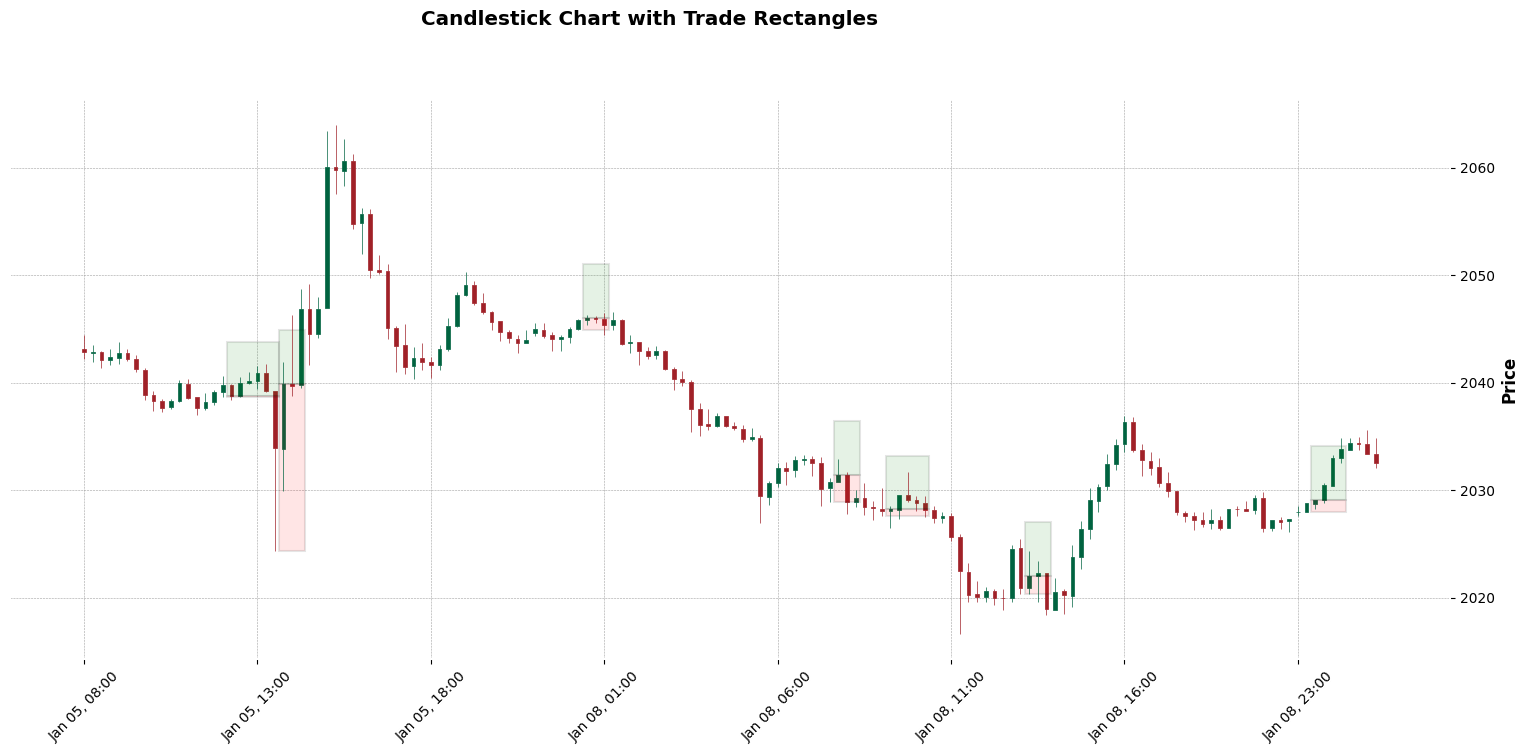

In [35]:
def plot_candles_with_rects(ohlc_df: pd.DataFrame, trades_df: Optional[pd.DataFrame] = None,
                           start_row: int = 0, end_row: Optional[int] = None,
                           title: Optional[str] = None, config: Optional[dict] = None) -> None:
    """Plot candlestick chart with trade rectangles.

    Args:
        ohlc_df: DataFrame with OHLC data (index: datetime, columns: Open, High, Low, Close)
        trades_df: DataFrame with trade data (optional)
        start_row: Starting row index
        end_row: Ending row index (optional)
        title: Chart title (optional)
        config: Configuration dictionary for plot settings (optional)
    """
    try:
        # Use default config if none provided
        config = config or get_default_config()

        # Validate input DataFrame
        required_columns = ['Open', 'High', 'Low', 'Close']
        if not all(col in ohlc_df.columns for col in required_columns):
            raise ValueError(f"OHLC DataFrame must contain columns: {required_columns}")

        # Prepare view
        view = ohlc_df.iloc[start_row:end_row].copy()
        if view.empty:
            raise ValueError("Selected data slice is empty")

        rects: List[patches.Rectangle] = []

        if trades_df is not None:
            # Validate trades DataFrame
            trade_columns = ['Entry Time', 'Exit Time', 'Entry Price', 'Exit Price']
            if not all(col in trades_df.columns for col in trade_columns):
                logger.warning(f"Trades DataFrame missing some required columns: {trade_columns}")
                return

            # print (view.iloc[17])

            for _, trade in trades_df.iterrows():
                try:
                    entry_idx = view.index.get_loc(trade['Entry Time'])
                    exit_idx = view.index.get_loc(trade['Exit Time'])
                    width = exit_idx - entry_idx + 1



                    # print (entry_idx)
                    # print (trade['Entry Price'] )
                    # print (trade['Exit Price'] )
                    # print ("===")

                    # Stop Loss rectangle
                    sl_value = trade.get('SL')
                    if pd.notna(sl_value):
                        add_rectangle(rects, entry_idx, trade['Entry Price'], sl_value,
                                     width=width, **config['sl_rect'])

                    # Take Profit rectangle
                    tp_value = trade.get('TP')
                    if pd.notna(tp_value):
                        add_rectangle(rects, entry_idx, trade['Entry Price'], tp_value,
                                     width=width, **config['tp_rect'])

                except KeyError as e:
                    logger.warning(f"Skipping trade due to missing index: {str(e)}")
                    continue
                except Exception as e:
                    logger.error(f"Error processing trade: {str(e)}")
                    continue

        # Plot chart
        fig, axlist = mpf.plot(
            view,
            type='candle',
            style=config['style'],
            returnfig=True,
            figsize=config['figsize'],
            title=title or config['title']
        )
        ax = axlist[0]

        # Add rectangles
        for rect in rects:
            ax.add_patch(rect)

        plt.show()
        logger.info("Chart successfully plotted")

    except Exception as e:
        logger.error(f"Error in plot_candles_with_rects: {str(e)}")
        raise


    """Example usage of candlestick plotting functions."""

    # Create plot
plot_candles_with_rects(ohlc, trades, start_row=300, end_row=450)
